# An analysis framework for diabetes complecation predictions.

## Case 2: Predict the Immunoglobulin A Nephropathy risk for diabetes patients

In [1]:
from DiabetesComplecationPrediction.datasets import *
from DiabetesComplecationPrediction.preprocessing import *
from DiabetesComplecationPrediction.trained_model import SVMModel, RFModel, CatBoostModel

### Load the data

In [2]:
df_igan = diabetes_IgAN_risk()

In [3]:
df_igan.head()

,Age,Sex,Body height at 0M,Waist circumstances at 0M,Duration of T2DM,Smoking habit,Drinking habit,History of complications,History of hypertension,History of dyslipidemia,...,Urinary sugar at 3M,Urinary sugar at 12M,Urinary albumin/creatinine ratio at 0M,Urinary albumin/creatinine ratio at 3M,Urinary albumin/creatinine ratio at 12M,eGFR at 0M,eGFR at 1M,eGFR at 3M,eGFR at 12M,Risk of Nephropathy
0,61.0,1.0,170.0,101.0,72.0,0.0,0.0,1.0,1.0,1.0,...,NaN,0.0,53.3,NaN,6.4,55.940643,52.670513,50.686818,61.643003,0.0
1,42.0,1.0,184.0,NaN,36.0,2.0,0.0,1.0,0.0,1.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,64.0,1.0,169.0,NaN,168.0,2.0,0.0,1.0,0.0,1.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,57.0,1.0,168.5,NaN,144.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,63.0,2.0,151.0,88.5,72.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,30.0,27.1,56.6,77.754106,87.433453,89.274571,83.961202,1.0


In [4]:
df_igan.isnull().sum()

Age                             1
Sex                             1
Body height  at 0M             14
Waist circumstances at 0M     312
Duration of T2DM               66
                             ... 
eGFR at 0M                     89
eGFR at 1M                    136
eGFR at 3M                    135
eGFR at 12M                   155
Risk of Nephropathy             1
Length: 165, dtype: int64

### Check the missing rate

In [5]:
del_feature = Del_Feature()

In [6]:
igan_missing = del_feature.missing_rate(df_igan)
igan_missing

,missing_rate
Proinsulin/Insulin at 12M,78.305520
Insulin at 12M.1,77.920411
CPI at 12M,77.920411
Proinsulin at 12M,77.920411
C-peptide at 12M,77.792041
...,...
History of myocardial infarction,0.128370
History of cerebral infarction,0.128370
History of angina pectoris,0.128370
History of heart failure,0.128370


### Plot the missing rate histogram

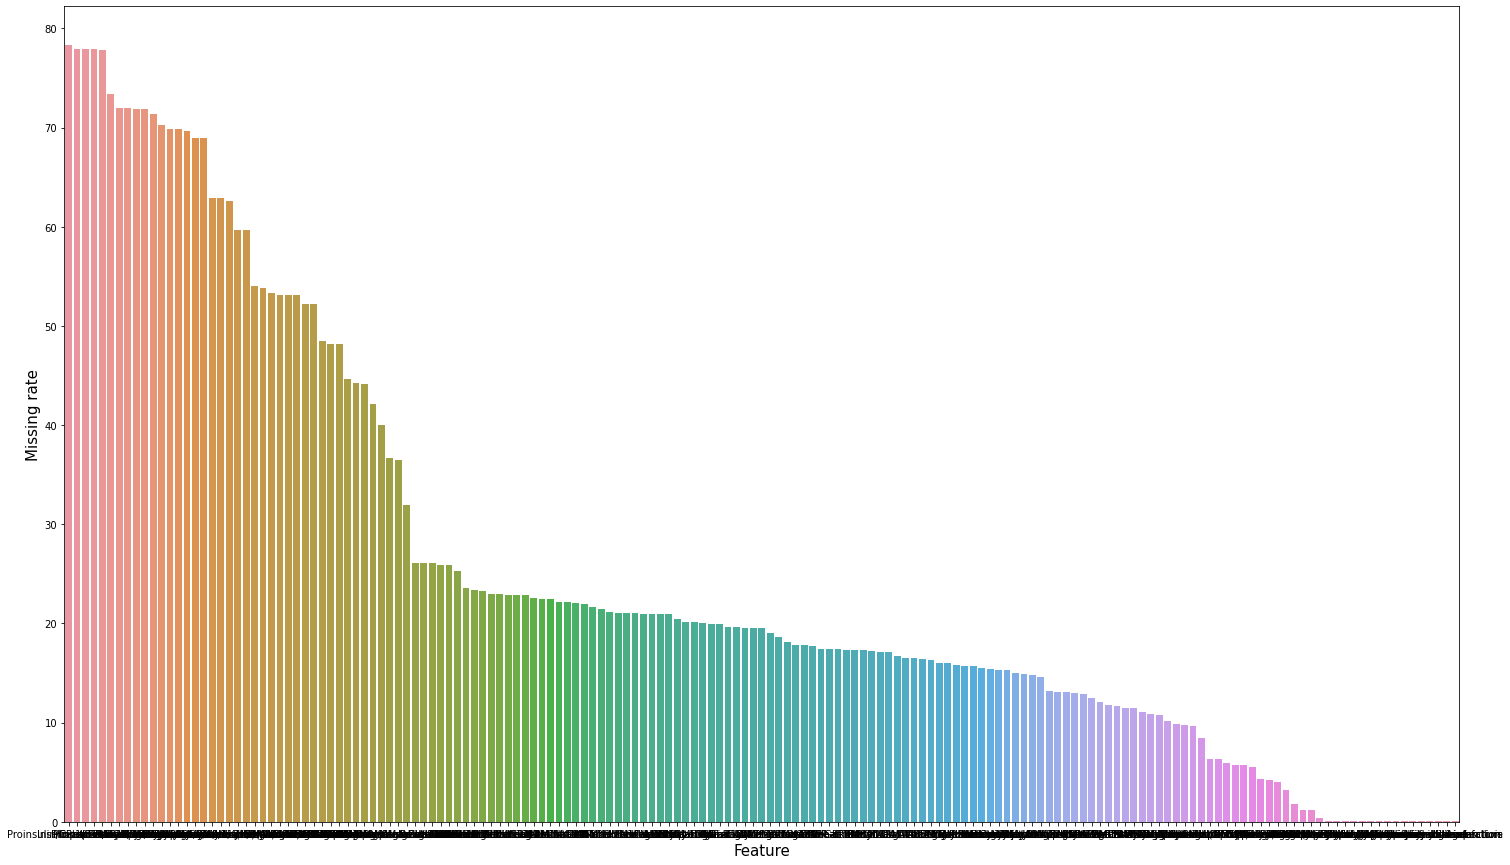

In [7]:
del_feature.missing_rate_hist(df_igan)

### Delete features with missing rate high than 30%

In [8]:
df_igan = del_feature.del_feature(df_igan, igan_missing)

In [9]:
df_igan.isnull().sum()

Age                      1
Sex                      1
Body height  at 0M      14
Duration of T2DM        66
Smoking habit           31
                      ... 
eGFR at 0M              89
eGFR at 1M             136
eGFR at 3M             135
eGFR at 12M            155
Risk of Nephropathy      1
Length: 124, dtype: int64

In [10]:
df_igan = df_igan[df_igan['Risk of Nephropathy'].notnull()]

### Inpute the rest missing values with mean

In [11]:
df_igan = normal_impute(df_igan)

In [12]:
df_igan.isnull().sum()

Age                    0
Sex                    0
Body height  at 0M     0
Duration of T2DM       0
Smoking habit          0
                      ..
eGFR at 0M             0
eGFR at 1M             0
eGFR at 3M             0
eGFR at 12M            0
Risk of Nephropathy    0
Length: 124, dtype: int64

### Generate feature list based on correlation

In [13]:
feature_igan = Feature(df_igan, 'Risk of Nephropathy')
feature_igan

In [14]:
feature_list_igan = feature_igan.feature_list()
feature_list_igan

['History of angina pectoris',
 'History of kidney disease',
 'Creatinine at 0M ',
 'Triglyceride at 3M',
 'Creatinine at 3M ',
 'Systolic blood pressure at 0M ',
 'History of hypertension',
 'Urinary protein at 1M',
 'History of retinopathy',
 'Triglyceride at 12M',
 'Systolic blood pressure at 12M ',
 'Creatinine at 1M ',
 'Age',
 'LDL-C at 12M',
 'BUN at 0M',
 'Urinary protein at 3M',
 'Urinary protein at 0M',
 'History of liver disease',
 'K at 12M',
 'BUN at 3M']

### Encode the target column

In [15]:
df_igan = encode_categ(df_igan, 'Risk of Nephropathy')

### Fit the catboost model

In [16]:
cb_igan = CatBoostModel(df_igan, 
                        feature_list_igan,
                        'Risk of Nephropathy')

In [17]:
igan_cb_model = cb_igan.trained_model()

Learning rate set to 0.007944
0:	learn: 0.6907896	total: 56.6ms	remaining: 56.6s
1:	learn: 0.6880006	total: 59.6ms	remaining: 29.8s
2:	learn: 0.6854877	total: 61.1ms	remaining: 20.3s
3:	learn: 0.6830226	total: 62.7ms	remaining: 15.6s
4:	learn: 0.6810088	total: 64.4ms	remaining: 12.8s
5:	learn: 0.6783479	total: 65.9ms	remaining: 10.9s
6:	learn: 0.6760682	total: 67.9ms	remaining: 9.63s
7:	learn: 0.6738818	total: 69.7ms	remaining: 8.64s
8:	learn: 0.6719271	total: 70.9ms	remaining: 7.81s
9:	learn: 0.6697141	total: 72.3ms	remaining: 7.16s
10:	learn: 0.6674802	total: 73.8ms	remaining: 6.63s
11:	learn: 0.6655910	total: 74.8ms	remaining: 6.16s
12:	learn: 0.6637977	total: 75.8ms	remaining: 5.75s
13:	learn: 0.6619234	total: 76.7ms	remaining: 5.4s
14:	learn: 0.6599695	total: 77.8ms	remaining: 5.11s
15:	learn: 0.6584179	total: 78.8ms	remaining: 4.85s
16:	learn: 0.6568313	total: 79.6ms	remaining: 4.6s
17:	learn: 0.6548268	total: 80.4ms	remaining: 4.38s
18:	learn: 0.6529280	total: 81.2ms	remaining: 

### Evaluate the catboost model

In [18]:
cb_igan_accu = cb_igan.model_accuracy()
cb_igan_accu

Learning rate set to 0.007944
0:	learn: 0.6907896	total: 1.32ms	remaining: 1.32s
1:	learn: 0.6880006	total: 2.42ms	remaining: 1.21s
2:	learn: 0.6854877	total: 3.47ms	remaining: 1.15s
3:	learn: 0.6830226	total: 4.51ms	remaining: 1.12s
4:	learn: 0.6810088	total: 5.59ms	remaining: 1.11s
5:	learn: 0.6783479	total: 6.88ms	remaining: 1.14s
6:	learn: 0.6760682	total: 7.86ms	remaining: 1.11s
7:	learn: 0.6738818	total: 8.88ms	remaining: 1.1s
8:	learn: 0.6719271	total: 9.9ms	remaining: 1.09s
9:	learn: 0.6697141	total: 11ms	remaining: 1.09s
10:	learn: 0.6674802	total: 12.1ms	remaining: 1.09s
11:	learn: 0.6655910	total: 14.7ms	remaining: 1.21s
12:	learn: 0.6637977	total: 17.7ms	remaining: 1.34s
13:	learn: 0.6619234	total: 18.8ms	remaining: 1.32s
14:	learn: 0.6599695	total: 20.7ms	remaining: 1.36s
15:	learn: 0.6584179	total: 22ms	remaining: 1.35s
16:	learn: 0.6568313	total: 23.2ms	remaining: 1.34s
17:	learn: 0.6548268	total: 24.4ms	remaining: 1.33s
18:	learn: 0.6529280	total: 25.5ms	remaining: 1.31

70.51282051282051

In [19]:
cb_igan_roc = cb_igan.roc(igan_cb_model)
cb_igan_roc

0.5103658536585366

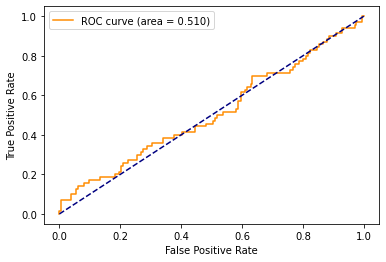

In [20]:
cb_igan.roc_plot(igan_cb_model)

### Predict using CatBoost model

In [21]:
igan_pre = load_csv('DiabetesComplecationPrediction/datasets/data/igan_exm.csv')
igan_pre = igan_pre.set_index(' ')

In [22]:
from DiabetesComplecationPrediction.information import IgAN_checker_csv
IgAN_checker_csv(igan_pre, 'CatBoost')

Learning rate set to 0.076715
0:	learn: 1.0482657	total: 7.22ms	remaining: 7.21s
1:	learn: 1.0034283	total: 9.66ms	remaining: 4.82s
2:	learn: 0.9623610	total: 11.6ms	remaining: 3.85s
3:	learn: 0.9265068	total: 13.6ms	remaining: 3.38s
4:	learn: 0.8977783	total: 15.4ms	remaining: 3.07s
5:	learn: 0.8709717	total: 18ms	remaining: 2.99s
6:	learn: 0.8451325	total: 20.7ms	remaining: 2.93s
7:	learn: 0.8226439	total: 22.9ms	remaining: 2.83s
8:	learn: 0.8025022	total: 25.5ms	remaining: 2.81s
9:	learn: 0.7831255	total: 28.4ms	remaining: 2.81s
10:	learn: 0.7663554	total: 30.8ms	remaining: 2.77s
11:	learn: 0.7498631	total: 32.9ms	remaining: 2.71s
12:	learn: 0.7357908	total: 35.1ms	remaining: 2.66s
13:	learn: 0.7205008	total: 36.9ms	remaining: 2.6s
14:	learn: 0.7072722	total: 38.8ms	remaining: 2.55s
15:	learn: 0.6959103	total: 43.5ms	remaining: 2.68s
16:	learn: 0.6856345	total: 48ms	remaining: 2.77s
17:	learn: 0.6763316	total: 50.8ms	remaining: 2.77s
18:	learn: 0.6670813	total: 53.2ms	remaining: 2.7

### Fit the random forest model

In [23]:
rf_igan = RFModel(df_igan,
                  feature_list_igan,
                  'Risk of Nephropathy')

In [24]:
rf_igan_model = rf_igan.trained_model()

### Evaluate the random forest model

In [25]:
rf_igan.model_accuracy()

69.23076923076923

In [26]:
rf_igan.roc()

0.4874708372937009

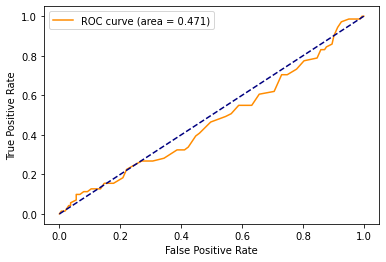

In [27]:
rf_igan.roc_plot()

### Predict using random forest model

In [28]:
IgAN_checker_csv(igan_pre, 'Random Forest') 

The risk of developing Nephropathy as complication of diabetes is low.
[2]
The accuracy of this prediction is 68.80%.
